In [7]:
import requests
import os
import logging
from concurrent.futures import ThreadPoolExecutor

In [14]:
#pull store images locallly using the home sales records datafreme


# Configure logging
logging.basicConfig(filename='download_errors.log', level=logging.ERROR,
                    format='%(asctime)s - %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

url='https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/'
params = {'access_token': key[0],
         'logo': 'false',
         'attribution': 'false'}

def download_image(Id, lat, long, zoom, bearing):
    
    #create category(zoom level) directoy if it does not exist
    category_dir = f'zoom-{zoom}'
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)
        
    #define file name
    file_name = f'{Id}-{zoom}.jpg'
    file_path=os.path.join(category_dir, file_name)
    
    if not os.path.exists(file_path):
        queryString = f'{long},{lat},{zoom},{bearing}/300x300' 
        response = requests.get(url+queryString, params=params)
        
        if response.status_code==200:
            image_data = response.content
            #img = Image.open(image_data)
            
            #save the image to the specified directory with the given name
            with open(file_path, 'wb') as f:
                f.write(image_data)           
        else:
            error_message=f'failed to download image with id: {Id}, lat: {lat}, long: {long}, status_code: {response.status_code}'
            logging.error(error_message)         
    
    #else: print('file found')
        
def get_images(df, category):
    #with ThreadPoolExecutor(max_workers=10) as executor:
    counter=0
    for i, row in df.iterrows():
        lat_row = row['latitude']
        long_row = row['longitude']
        Id_row=row['id']
        #executor.submit(download_image(Id_row, lat_row, long_row, category, 0))
        download_image(Id_row, lat_row, long_row, category, 0)
        
        counter+= 1
        if counter%1000==0:
            print(f'{counter} rows processed')

   
    

In [10]:
import dill
#with open(r'df_images_input.pkd', 'rb') as f:
#     df_images_input = dill.load(f)

In [11]:
#load home sale records

with open(r'.\X_final.pkd', 'rb') as f:
   
     X_final = dill.load(f)

In [116]:
#%%time
#get_images(X_final[15000:15100], 11.5)  

CPU times: total: 2.28 s
Wall time: 48.4 s


In [15]:
%%time
get_images(X_final[15000:], 11.5)  

1000 rows processed
2000 rows processed
3000 rows processed
4000 rows processed
5000 rows processed
6000 rows processed
7000 rows processed
8000 rows processed
9000 rows processed
10000 rows processed
11000 rows processed
12000 rows processed
13000 rows processed
14000 rows processed
15000 rows processed
16000 rows processed
17000 rows processed
18000 rows processed
19000 rows processed
20000 rows processed
21000 rows processed
22000 rows processed
23000 rows processed
24000 rows processed
25000 rows processed
26000 rows processed
27000 rows processed
28000 rows processed
29000 rows processed
30000 rows processed
31000 rows processed
32000 rows processed
33000 rows processed
34000 rows processed
35000 rows processed
36000 rows processed
37000 rows processed
38000 rows processed
39000 rows processed
40000 rows processed
41000 rows processed
CPU times: total: 24min 7s
Wall time: 7h 5min 27s


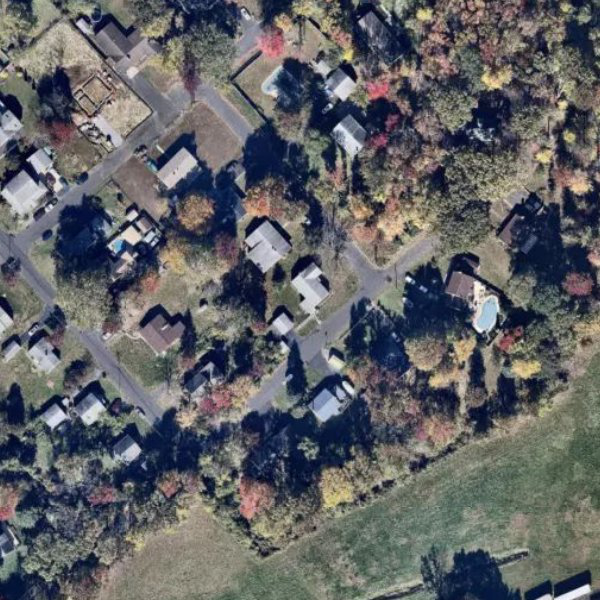

In [3]:
from PIL import Image
img = Image.open(r'.\Capstone\Satellite Images\zoom-16.25\XXX-PA-19056-16.25.jpg')
img